# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [2]:
import numpy as np
from scipy import optimize
import sympy as sm
from functions_1 import *
from class_1 import *
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

# Model description

**Write out the model in equations here.** 

Make sure you explain well the purpose of the model and comment so that other students who may not have seen it before can follow.  

## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

## Numerical solution

In [462]:
Marie = agent(0,75,50,0.8,50)
Luís = firm(0,40,50,1.2,50)
César = firm(1,45,50,1.1,50)

# trade(Marie,César,n_sellers = 2,do_print=True)
# print(Marie.curr_p,Luís.curr_p,César.curr_p)
# trade(Marie,Luís,n_sellers = 2,do_print=True)
# print(Marie.curr_p,Luís.curr_p,César.curr_p)
day = 1
inflation = 50
firms = [Luís,César]

In [622]:
print(day)
rand.shuffle(firms)


labor_market(Marie,firms[0],inflation=inflation,constrained=True,do_print=True)
# print("After first interaction:",Marie.curr_w, César.curr_w, Luís.curr_w, "money:",Marie.cash, César.cash Luís.cash)
labor_market(Marie,firms[1],inflation=inflation,constrained=True,do_print=True,)
# print("After second interaction:",Marie.curr_w, César.curr_w, Luís.curr_w, "money:",Marie.cash, César.cash Luís.cash)

if not Luís.employed:
    Luís.curr_w += 1
if not César.employed:
    César.curr_w += 1
if not Marie.worked:
    Marie.curr_w -= 1

#reset
Marie.worked = False
Luís.employed = False
César.employed = False
print("After ajusdtments:",Marie.curr_w, César.curr_w, Luís.curr_w, "money:",Marie.cash, César.cash, Luís.cash)

print("\n")
rand.shuffle(firms)

trade(Marie,firms[0],constrained=True,do_print=True)
# print("After first interaction:",Marie.curr_p, César.curr_p, Luís.curr_p,Marie.bought, "money:",Marie.cash, César.cash Luís.cash)
trade(Marie,firms[1],constrained=True,do_print=True)
# print("After second interaction:",Marie.curr_p, César.curr_p, Luís.curr_p, Marie.bought, "money:",Marie.cash, César.cash Luís.cash)

if not Luís.sold:
    Luís.curr_p -= 1
if not César.sold:
    César.curr_p -= 1
if not Marie.bought:
    Marie.curr_p += 1

inflation = (firms[0].curr_p+firms[1].curr_p)/2

Marie.bought = False
Luís.sold = False
César.sold = False
print("After ajusdtments:", Marie.curr_p, César.curr_p, Luís.curr_p, "money:",Marie.cash, César.cash, Luís.cash,César.stock)

day += 1




160
The trade was successful 1, for a wage of 45 (real wage: 1.0714285714285714)
After ajusdtments: 46 44 43 money: 258 0 42


The trade was successful, for a price of 45
After ajusdtments: 54 46 39 money: 213 45 42 0


In [ ]:
list_test = [[Marie,Luís],[Marie,César]]

[i for i in list_test if i[1] != César and i[0] =]

SyntaxError: invalid syntax (1956102153.py, line 3)

day 0:
The trade was successful, for a price of 20
The trade was successful, for a price of 20
The trade was successful, for a price of 20
The trade was successful, for a price of 20
The trade was successful, for a price of 20
The trade was successful, for a price of 20
The trade was successful, for a price of 20
The trade was successful, for a price of 20
The trade was successful, for a price of 20
The trade was successful, for a price of 20
today's price: 20.0 Today's wage: 20.0 real wage: 1.0
980
1000
1000
980
980
1000
980
1000
980
1000
980
1000
1000
1000
1000
980
1000
1000
1000
980
1000
980
1000
1000
980
17 10
day 1:
The trade was successful, for a price of 21
The trade was successful, for a price of 21
The trade was successful, for a price of 21
The trade was successful, for a price of 21
The trade was successful, for a price of 21
The trade was successful, for a price of 21
The trade was successful, for a price of 21
today's price: 21.0 Today's wage: nan real wage: nan
1000
1000


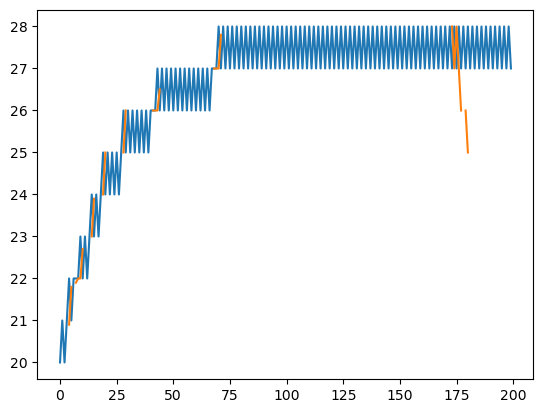

In [656]:
p_dem_func = lambda x: 55 - 2*x*25/25
p_sup_func = lambda x: 2*x*25/25
rw_dem_func = lambda x: 2.16 - 0.08*x*25/25
rw_sup_func = lambda x: 0.08*x*25/25 + 0.16

# p_dem_func = lambda x: 75
# p_sup_func = lambda x: 50 - 5*x
# rw_dem_func = lambda x: 1.3 - 0.1 * x
# rw_sup_func = lambda x: 0.8


inflation_list, wage_list = economy_simulation(p_dem_func,p_sup_func,20,rw_dem_func,rw_sup_func,20,n_days=200,n_agents=25,n_firms=25).simulation(constrained=True)

plt.plot(range(200),inflation_list,wage_list)

[ 5. 10. 15. 20. 25. 30. 35. 40. 45. 50.] [50. 45. 40. 35. 30. 25. 20. 15. 10.  5.]


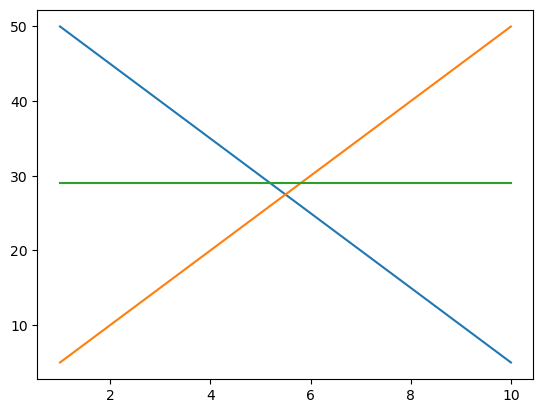

In [16]:
x = np.linspace(1,10,10)
y_p_d = 55 - 2*x*25/10
y_p_s = 2*x*25/10
print(y_p_s,y_p_d)
plt.plot(x,y_p_d)
plt.plot(x,y_p_s)
plt.plot(x,[29 for i in range(10)])
plt.plot([5],[27.5])

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

In [258]:
A = False
B = True

C = (A and B) or not A

print(C)


True


# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 